In [1]:
# Intialize the tensorflow-gpu <-> physical matching

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
from load.load_data import load_opendata
from load.load_data import load_mydata

import matplotlib.pyplot as plt
%matplotlib inline
import random

In [3]:
myloader = load_mydata()
X_my, Y_my = myloader.load_data(classifier_label="Weak", dsize=(64,64), comp_ratio=4)
X_my_test, Y_my_test = myloader.load_test_data(classifier_label="Weak", dsize=(64,64), comp_ratio=4)

print("My data is ", len(Y_my), ",  My Test set is ", len(Y_my_test))

My data folder lists are..
20211012_center_belt_nomask_minseok1
20211012_center_unbelt_nomask_minseok1
20211015_center_belt_mask_yukhyun1
20211015_center_unbelt_mask_sungwook1
20211015_center_unbelt_mask_yukhyun1
20211015_center_unbelt_nomask_sungwook1
20211015_center_unbelt_nomask_sungwook2
20211015_center_unbelt_nomask_yukhyun1
20211015_close_unbelt_nomask_sungwook1
20211017_center_belt_mask_yukhyun1
20211017_center_belt_nomask_yukhyun1
20211017_center_unbelt_mask_sungwook1
20211017_center_unbelt_nomask_sungwook1
20211019_center_belt_mask_juwon1
20211019_center_belt_mask_juwon2
20211019_center_belt_mask_juwon3
20211019_center_belt_nomask_juwon1
20211019_center_belt_nomask_juwon2
20211019_center_unbelt_mask_juwon3
20211019_center_unbelt_nomask_juwon1
20211019_close_belt_mask_juwon1
20211019_close_unbelt_mask_juwon1
20211019_far_belt_mask_juwon1
20211019_far_unbelt_mask_juwon1
20211019_phone_belt_mask_juwon1
20211019_phone_unbelt_mask_juwon1
20211020_behind_belt_mask_sujin1
20211020_be

My data Loading with Weak: 24051it [00:36, 653.97it/s]


Test data folder lists are..
20211012_center_belt_nomask_minseok1
20211012_center_unbelt_nomask_minseok1
20211015_center_belt_mask_yukhyun1
20211015_center_unbelt_mask_sungwook1
20211015_center_unbelt_mask_yukhyun1
20211015_center_unbelt_nomask_sungwook1
20211015_center_unbelt_nomask_sungwook2
20211015_center_unbelt_nomask_yukhyun1
20211015_close_unbelt_nomask_sungwook1
20211017_center_belt_mask_yukhyun1
20211017_center_belt_nomask_yukhyun1
20211017_center_unbelt_mask_sungwook1
20211017_center_unbelt_nomask_sungwook1
20211019_center_belt_mask_juwon1
20211019_center_belt_mask_juwon2
20211019_center_belt_mask_juwon3
20211019_center_belt_nomask_juwon1
20211019_center_belt_nomask_juwon2
20211019_center_unbelt_mask_juwon3
20211019_center_unbelt_nomask_juwon1
20211019_close_belt_mask_juwon1
20211019_close_unbelt_mask_juwon1
20211019_far_belt_mask_juwon1
20211019_far_unbelt_mask_juwon1
20211019_phone_belt_mask_juwon1
20211019_phone_unbelt_mask_juwon1
20211020_center_belt_mask_sujin1
20211020_

Test data Loading with Weak: 1500it [00:02, 613.76it/s]

My data is  6036 ,  My Test set is  387


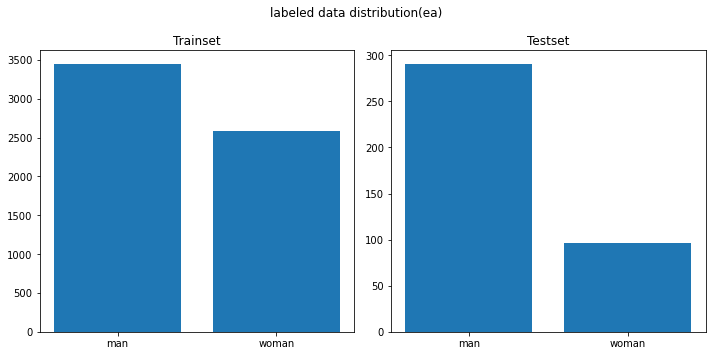

In [4]:
count_man =0
count_woman =0

for idx, i in enumerate(Y_my):
    if ( i == 's0'):
        count_man +=1
    elif ( i == 's1'):
        count_woman+=1

#남자(s0: 0), 여자(s1: 1)

count_test_man =0
count_test_woman =0

for idx, i in enumerate(Y_my_test):
    if ( i == 's0'):
        count_test_man +=1
    elif ( i == 's1'):
        count_test_woman +=1

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
plt.suptitle('labeled data distribution(ea)')
ax1.set_title('Trainset')
ax1.bar(['man','woman'],[count_man, count_woman])

ax2.set_title('Testset')
ax2.bar(['man','woman'],[count_test_man, count_test_woman])

plt.tight_layout()

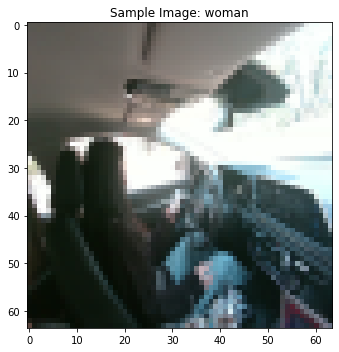

In [5]:
pick_rand1 = random.randint(0, len(X_my)-1)

fig, (ax1) = plt.subplots(1,1, figsize=(10,5))

ax1.imshow(X_my[pick_rand1])
if (Y_my[pick_rand1] == 's0'):
    ax1.set_title('Sample Image: man')
elif (Y_my[pick_rand1] == 's1'):
    ax1.set_title('Sample Image: woman')

plt.tight_layout()

In [6]:
import numpy as np

X = np.array(X_my)
Y = np.array(Y_my)

labels_list = list(set(Y))
labels_map = dict()
for idx, dat in enumerate(labels_list):
    labels_map[dat] = idx

#남자(s0: 0), 여자(s1: 1)
#to numerical labels
print("Before numerical mapping: ", Y[0], Y[-1])
Y = np.array(list(map(lambda x: labels_map[x], Y)))
print("After numerical mapping: ", Y[0], Y[-1])

print("My data shape is ", X.shape)
print("Test data shape is ", np.array(X_my_test).shape)

Before numerical mapping:  s1 s1
After numerical mapping:  0 0
My data shape is  (6036, 64, 64, 3)
Test data shape is  (387, 64, 64, 3)


In [7]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import random_rotation, random_shift, random_zoom

# Data Augmentation (5%*3=15%)
aug_X = []
aug_Y = []
for i in range(int(0.05*len(X))):
    data_aug_idx = random.randrange(0, len(X)-1)
    img=random_rotation(X[data_aug_idx], rg=80, row_axis=0, col_axis=1, channel_axis=2)
    aug_X.append(img)
    aug_Y.append(Y[data_aug_idx])

    data_aug_idx = random.randrange(0, len(X)-1)
    img=random_shift(X[data_aug_idx], wrg=0.1, hrg=0.1, row_axis=0, col_axis=1, channel_axis=2)
    aug_X.append(img)
    aug_Y.append(Y[data_aug_idx])

    data_aug_idx = random.randrange(0, len(X)-1)
    img=random_zoom(X[data_aug_idx], zoom_range=[0.6,0.9], row_axis=0, col_axis=1, channel_axis=2)
    aug_X.append(img)
    aug_Y.append(Y[data_aug_idx])


X = np.concatenate((X, np.array(aug_X)))
Y = np.concatenate((Y, np.array(aug_Y)))
print("Image samples with augmentation are" ,len(Y))

# Shuffled Image
temp_pool = list(zip(X,Y))
random.shuffle(temp_pool)

X, Y = zip(*temp_pool)


# Normalized Image
X = np.array(X)/255.0
print("Before one-hot encoding: ", Y[0], Y[-1])
Y = to_categorical(np.array(Y))
print("After one-hot encoding: ", Y[0], Y[-1])

print(X.shape)
print(Y.shape)


X_test = np.array(X_my_test)/255.0

Y_my_test = np.array(list(map(lambda x: labels_map[x], Y_my_test)))
Y_test = to_categorical(np.array(Y_my_test))

Image samples with augmentation are 6939
Before one-hot encoding:  0 0
After one-hot encoding:  [1. 0.] [1. 0.]
(6939, 64, 64, 3)
(6939, 2)


In [8]:
# Train, Val, Test Split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, stratify=Y) 

In [9]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(5551, 64, 64, 3)
(1388, 64, 64, 3)
(387, 64, 64, 3)


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from model.model_cnn import model_cnn
import tensorflow as tf
import os

def scheduler(epoch, lr):
    if epoch in [7,9,12,20]:
        lr = 0.1*lr
    return lr
    
model = model_cnn(input_shape = (64, 64, 3), classifier="Weak", base_trainable = True)

adam = Adam(learning_rate=0.001)
ls_callback = LearningRateScheduler(scheduler)
es_callback = EarlyStopping(monitor='val_acc', patience=3)
filepath = os.path.join(os.getcwd(), "ckpt/", "Weak-{epoch:01d}-{val_acc:.2f}.h5")
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.compile(loss='categorical_crossentropy', optimizer = adam, metrics=['acc',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(), tf.keras.metrics.AUC(thresholds=[0.5,0.7,0.9,0.95]) ])

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
1st_conv (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
1st_relu (ReLU)              (None, 64, 64, 64)        0         
_________________________________________________________________
1st_maxpool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
2nd_conv (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
2nd_relu (ReLU)              (None, 32, 32, 128)       0         
_________________________________________________________________
2nd_maxpool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [12]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, shuffle=True, validation_data=[X_val, y_val], callbacks=[ls_callback,es_callback, checkpoint])

Train on 5551 samples, validate on 1388 samples
Epoch 1/5
5536/5551 [============================>.] - ETA: 0s - loss: 0.1491 - acc: 0.9566 - true_positives: 5296.0000 - true_negatives: 5296.0000 - auc: 0.9722
Epoch 00001: val_acc improved from -inf to 0.99207, saving model to /home/joker1251/Desktop/owen/DataAnalysis_Science/DS_Master_21/Project/ckpt/Weak-1-0.99.h5
5551/5551 [==============================] - 168s 30ms/sample - loss: 0.1487 - acc: 0.9568 - true_positives: 5311.0000 - true_negatives: 5311.0000 - auc: 0.9723 - val_loss: 0.0176 - val_acc: 0.9921 - val_true_positives: 1377.0000 - val_true_negatives: 1377.0000 - val_auc: 0.9952
Epoch 2/5
5536/5551 [============================>.] - ETA: 0s - loss: 0.0138 - acc: 0.9946 - true_positives: 5506.0000 - true_negatives: 5506.0000 - auc: 0.9969
Epoch 00002: val_acc improved from 0.99207 to 0.99640, saving model to /home/joker1251/Desktop/owen/DataAnalysis_Science/DS_Master_21/Project/ckpt/Weak-2-1.00.h5
5551/5551 [================

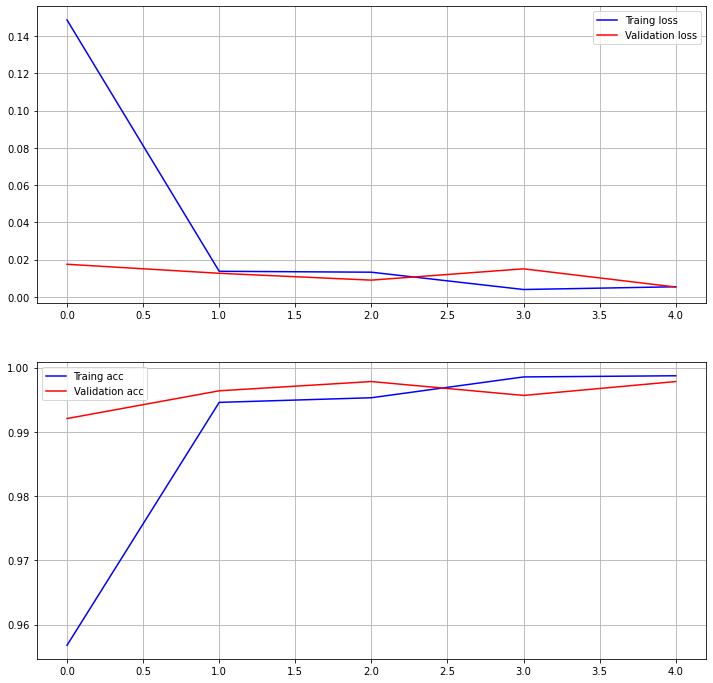

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,12))
ax1.plot(history.history['loss'], color='b', label='Traing loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation loss')
ax1.legend()
ax1.grid()

ax2.plot(history.history['acc'], color='b', label='Traing acc')
ax2.plot(history.history['val_acc'], color='r', label='Validation acc')
ax2.legend()
ax2.grid()


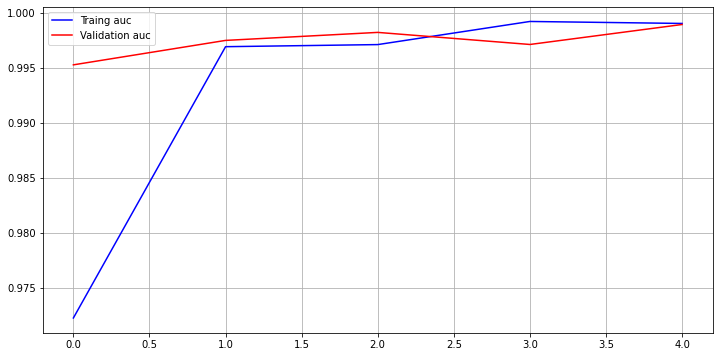

In [14]:
fig, (ax1) = plt.subplots(1,1, figsize=(12,6))
ax1.plot(history.history['auc'], color='b', label='Traing auc')
ax1.plot(history.history['val_auc'], color='r', label='Validation auc')
ax1.legend()
ax1.grid()


In [15]:
# Test using X_test data

X_pred=model.predict(X_test)
def score(preds, labels):
    ret=0
    for pred, label in zip(preds, labels):

        pred_idx = np.argmax(pred)
        label_idx = np.argmax(label)

        if (pred_idx == label_idx):
            ret+=1

    ret = ret / len(preds)
    return ret

print("Test Predict is: {}%".format(score(X_pred, Y_test)*100))


Test Predict is: 100.0%


In [16]:
def matching_plot(x, pred, label,  ax, thd=0.5):
    box1 = {'boxstyle': 'round',
        'ec': (0.0, 0.0, 0.0),
        'fc': (1.0, 1.0, 1.0)}

    pick = random.randint(0, len(x)-1)
    ax.imshow(x[pick])

    pred_idx = np.argmax(pred[pick])
    label_idx = np.argmax(label[pick])

    if pred[pick][pred_idx] > thd:
        p = 1
    else:
        p = 0

    if (label_idx == pred_idx):
        if (p == 1):
            ax.set_title("Predicted with high confidence as {:.2f}".format((pred[pick][pred_idx])))
        elif (p ==0):
            ax.set_title("Predicted with low  confidence as {:.2f}".format((pred[pick][pred_idx])))


        for key, val in labels_map.items():
            if (pred_idx == val):
                if key == 's0':
                    tit = "Man"
                elif key == 's1':
                    tit = "Woman"
                ax.text(10,10, tit, bbox=box1, fontsize=15)
    else:
        ax.set_title("Wrong Predicted")    
        ax.text(10,10,"Fail", bbox=box1, fontsize=15)    

#남자(s0: 0), 여자(s1: 1)


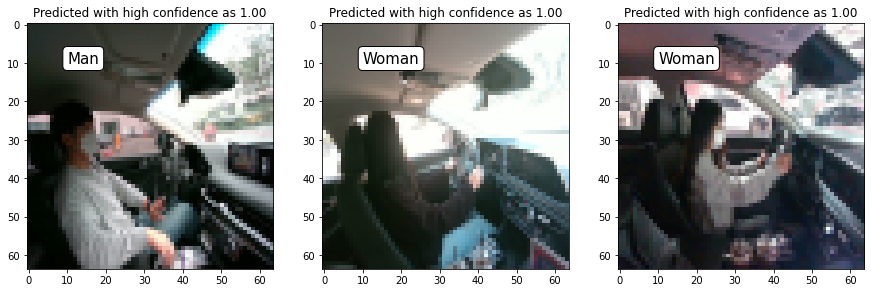

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))
for i in range(3):
    matching_plot(X_test, X_pred, Y_test, ax[i], thd=0.8)
plt.show()

In [24]:
import utils.xai_viz
from utils.xai_viz import explainable_model
import importlib
importlib.reload(utils.xai_viz)

xai = explainable_model(model)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
1st_conv (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
1st_relu (ReLU)              (None, 64, 64, 64)        0         
_________________________________________________________________
1st_maxpool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
2nd_conv (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
2nd_relu (ReLU)              (None, 32, 32, 128)       0         
_________________________________________________________________
2nd_maxpool (MaxPooling2D)   (None, 16, 16, 128)       0     

Text(0.5, 1.0, 'Predicted 0 as 1.00prob,  Label(GT): 0')

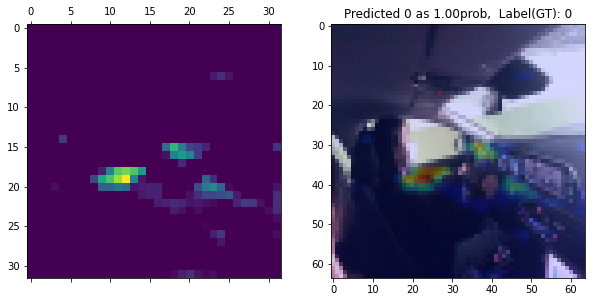

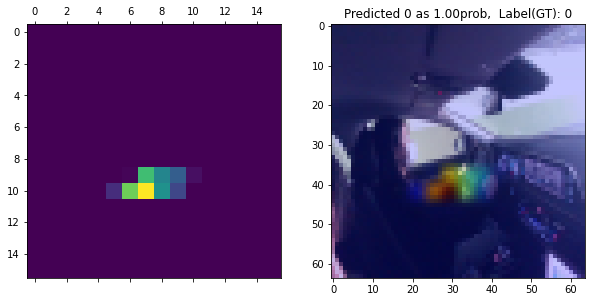

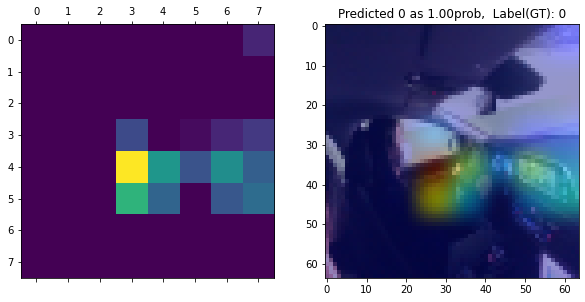

In [77]:
pick = random.randint(0, len(X_test)-1)

heatmap = xai.explainable_model(X_test[pick], "2nd_relu", alpha=0.4)
fig_title = "Predicted {} as {:.2f}prob".format(np.argmax(X_pred[pick]) , np.max(X_pred[pick])) + ",  Label(GT): {}".format(np.argmax(Y_test[pick]))
plt.title(fig_title)
heatmap = xai.explainable_model(X_test[pick], "3rd_conv", alpha=0.6)
fig_title = "Predicted {} as {:.2f}prob".format(np.argmax(X_pred[pick]) , np.max(X_pred[pick])) + ",  Label(GT): {}".format(np.argmax(Y_test[pick]))
plt.title(fig_title)
heatmap = xai.explainable_model(X_test[pick], "3rd_maxpool", alpha=0.8)
fig_title = "Predicted {} as {:.2f}prob".format(np.argmax(X_pred[pick]) , np.max(X_pred[pick])) + ",  Label(GT): {}".format(np.argmax(Y_test[pick]))
plt.title(fig_title)

In [78]:
# Save Model
model.save('./ckpt/model_weak_cnn')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./ckpt/model_weak_cnn/assets


In [79]:
# Load Model (Test)
from tensorflow.keras.models import load_model
model_load = load_model("./ckpt/model_weak_cnn")